In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def random_walk(n_iter,n_step,bias_prob_tails):
      all_walks=[]
      all_iter=[]
      for k in range(n_iter):
        it=[]
        seq=[]
        k=0
        dist=0
        r=np.random.rand(n_step)
        for i in r:
          if(i<=bias_prob_tails): #probability of having tail = 0.6
            dist+=-1
            seq=np.append(seq,dist)
          else:
            dist+=1
            seq=np.append(seq,dist)
          it=np.append(it,k)
          k+=1
        all_iter=np.append(all_iter,it)
        all_walks=np.append(all_walks,seq)
        all_walks=all_walks.reshape(-1,n_step)
      return all_walks

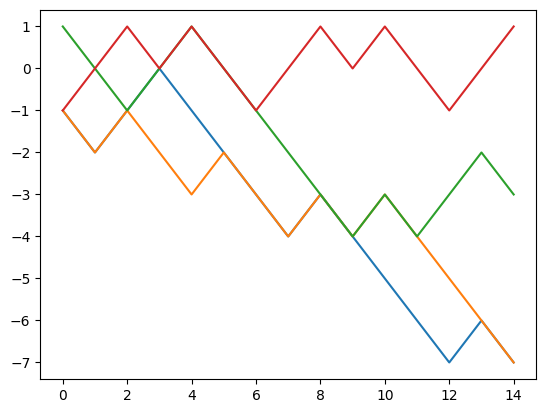

In [ ]:
walks=random_walk(10,15,0.7)
walks = walks.reshape(-1,15)
column_sums = np.sum(walks, axis=0)
r=range(15)
plt.plot(r,walks[0])
plt.plot(r,walks[1])
plt.plot(r,walks[2])
plt.plot(r,walks[3])

Complete randomness

In [ ]:
def formean(n,prob):
    allmean=[]
    walks=random_walk(n,15,prob)
    column_sums = np.sum(walks, axis=0)
    Mean=column_sums/n
    allmean=np.append(allmean,Mean)
    return allmean

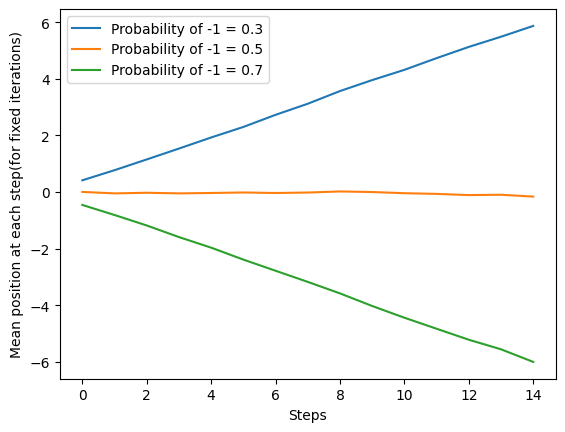

In [ ]:
r=range(15)
matrix=formean(1000,0.3)
matrix1=formean(1000,0.5)
matrix2=formean(1000,0.7)
plt.plot(r,matrix,label='Probability of -1 = 0.3')
plt.plot(r,matrix1,label='Probability of -1 = 0.5')
plt.plot(r,matrix2,label='Probability of -1 = 0.7')
plt.xlabel('Steps')
plt.ylabel('Mean position at each step(for fixed iterations)')
plt.legend()

Mean position when the tossing is positive biased is a line with positive slope implying that the poisition of of the random walker is in the positive direction as the steps taken increases.

For unbiased random walks, considering 1000 walks we can almost cancel out all the forward and backward movement posibilities hence the graph is a straight line on 0

similarly negative ka bol dena tum log

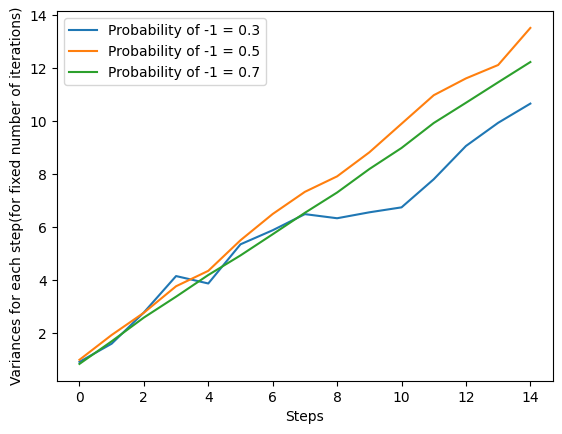

In [ ]:
column_variances = np.var(random_walk(50,15,0.3), axis=0)
plt.plot(r,column_variances,label='Probability of -1 = 0.3')
column_variances1 = np.var(random_walk(500,15,0.5), axis=0)
plt.plot(r,column_variances1,label='Probability of -1 = 0.5')
column_variances2 = np.var(random_walk(5000,15,0.7), axis=0)
plt.plot(r,column_variances2,label='Probability of -1 = 0.7')
plt.xlabel('Steps')
plt.ylabel('Variances for each step(for fixed number of iterations)')
plt.legend()

Variance increases pr kaise aur vo sab to sir ne class mein jo padhaya tha ussey hi bolna padega. Refer that

In [ ]:
def P(n,m):
  counter=0
  walk=random_walk(1000,15,0.7)
  for i in range(1000):
    if(walk[i][n]==m):
      counter+=1
  return counter/1000
#the steps are defined from 0 to 14
print(P(1,-2))


0.491


0.243 11
0.002722599301263102
0.211 -5
0.002331681268476217


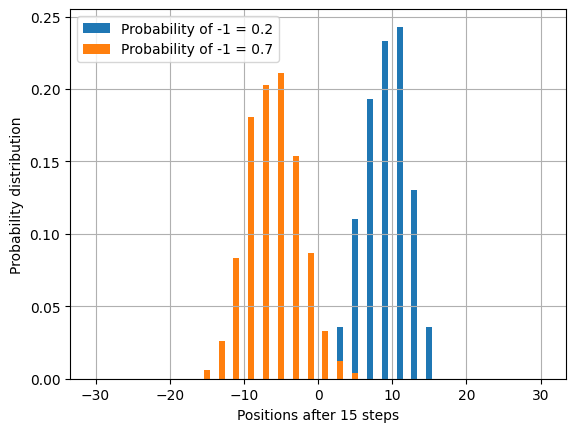

In [ ]:
#plotting the probability distribution of the random walker after n steps

def dist(n,p):
    prob=[]
    num_steps=n
    r= range(-30,31,1)
    walk=random_walk(1000,15,p)
    column_data=walk[:,num_steps]
    hash_table = dict()
    for i in range(-30,31,1):
      hash_table[i]= 0
    for i in column_data:
      hash_table[i]+=1
    for i in range(-30,31,1):
        hash_table[i]=hash_table[i]/1000
        prob=np.append(prob,hash_table[i])
    #plt.bar(r,prob)
    max_value=max(prob)
    index=np.argmax(prob)-30
    print(max_value,index)
    variance=np.var(prob)
    print(variance)
    return r,prob
    #plt.xlabel('Positions after n steps')
    #plt.ylabel('Probability distribution')
r,prob=dist(14,0.2)
plt.bar(r,prob, label= 'Probability of -1 = 0.2')
#r,prob=dist(10,0.5)
#plt.bar(r,prob, label= 'Probability of -1 = 0.5')
r,prob=dist(14,0.7)
plt.bar(r,prob, label= 'Probability of -1 = 0.7')
plt.xlabel('Positions after 15 steps')
plt.ylabel('Probability distribution')
plt.legend()
# column_data = walk[:, 10]
# column_data=column_data
# plt.hist(column_data, bins=20, density=False, color='blue', alpha=0.6)
# plt.xlabel('Value')
# plt.ylabel('Probability')
# plt.title('Histogram probability Distribution')
plt.grid(True)
# plt.show()

Observations kal karta iski